In [1]:
from models.lenet_models import LeNet1, LeNet4, LeNet5
from keras.layers import Input
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np

Using TensorFlow backend.


## Dataset (MNIST)

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_size = len(train_labels)
test_size = len(test_labels)
print("train size:", train_size, ",test size:", test_size)

train size: 60000 ,test size: 10000


7


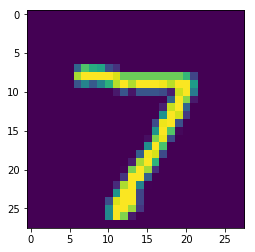

In [4]:
pyplot.imshow(test_images[0])
print(test_labels[0])

In [5]:
#jupyter notebook and tensorflow may create openmp instance each, which results in multiple instance of openmp error 
#solution: set environment variable
#KMP_DUPLICATE_LIB_OK=TRUE
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Model (LeNet)

In [6]:
model = LeNet1(Input((28,28,1)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 4)         104       
_________________________________________________________________
block1_pool1 (MaxPooling2D)  (None, 14, 14, 4)         0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 12)        1212      
_________________________________________________________________
block2_pool1 (MaxPooling2D)  (None, 7, 7, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 588)               0         
_________________________________________________________________
softmax (Dense)              (None, 10)                5890      
Total para

In [7]:
one_hot_prediction = model.predict(test_images[0].reshape(1,28,28,1))
prediction = one_hot_prediction.argmax(axis=-1)
print(prediction, one_hot_prediction)

[7] [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


## Testing DNN with Reinforcement Learning

### Input Selection

In [8]:
class CompleteTestSet:
    def __init__(self, initial_test_features, initial_test_labels):
        self.features = initial_test_features.copy()
        self.labels = initial_test_labels.copy()
        self.size = len(self.labels)
        self.weights = np.ones(self.size)
    
    def sample(self, batch_size):
        selected_indices = np.random.choice(self.size, size=batch_size, p=self.weights/np.sum(self.weights))
        return self.features[selected_indices].copy(), self.labels[selected_indices].copy()
    
    def __call__(self, batch_size):
        return self.sample(batch_size)
    
    def __len__(self):
        return self.size
    
    def append(self, new_features, new_labels):
        new_features = new_features.copy()
        new_labels = new_labels.copy()
        new_size = len(new_labels)
        self.features = np.concatenate((self.features, new_features), axis=0)
        self.labels = np.concatenate((self.labels, new_labels), axis=0)
        self.weights = np.concatenate((self.weights, np.ones(new_size)), axis=0)
        self.size += new_size
        
    def increase_weights(self, indices, increase=1):
        self.weights[indices] += increase
    
    def set_weights(self, indices, weights):
        self.weights[indices] = weights

In [9]:
testset = CompleteTestSet(test_images, test_labels)

In [10]:
testset.append([test_images[1]], [test_labels[1]])

In [11]:
len(testset)

10001

In [12]:
testset.increase_weights([10000], increase=100000)

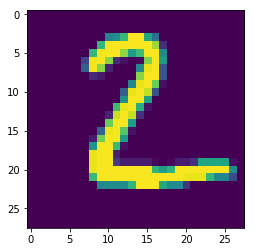

In [13]:
pyplot.imshow(testset.features[10000])

2


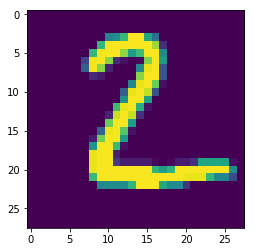

In [14]:
sample_image, sample_label = testset(1)
print(sample_label[0])
pyplot.imshow(sample_image[0])

### Coverage

In [15]:
from coverage import NeuronCoverage

#### usage/test of coverage class

In [16]:
neuroncoverage = NeuronCoverage(model, test_images[0].reshape(1,28,28,1))

In [17]:
neuroncoverage.get_current_coverage()

0

In [18]:
neuroncoverage.step(test_images[3].reshape(1,28,28,1))

0.7714285714285715

In [19]:
neuroncoverage.step(test_images[1].reshape(1,28,28,1))

0.12698412698412698

In [20]:
neuroncoverage.get_current_coverage()

0.8984126984126984

In [21]:
neuroncoverage.get_current_state()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [22]:
from kmn import measure_k_multisection_cov
from utils import calc_major_func_regions

In [24]:
res = measure_k_multisection_cov(model, test_images[0:5].reshape(-1, 28, 28, 1), 10000, train_inputs=train_images.reshape(-1, 28, 28, 1))

In [25]:
multisection_coverage_state = res[-3]
multisection_coverage = res[0]
print(multisection_coverage_state.sum() / len(multisection_coverage_state))
print(multisection_coverage)

0.0004220634920634921
0.042206349206349206%


In [26]:
from coverage import KMultisectionCoverage
(state_len_calc_input, k, train_inputs) = (test_images[0].reshape(-1, 28, 28, 1), 10000, train_images.reshape(-1, 28, 28, 1))

In [27]:
kmc = KMultisectionCoverage(model, state_len_calc_input, k, train_inputs)

In [28]:
kmc.get_current_coverage()

0

In [29]:
kmc.get_len_of_state()

6300000

In [30]:
kmc.step(test_images[0:5].reshape(-1, 28, 28, 1))

0.0004220634920634921

In [31]:
kmc.get_current_coverage()

0.0004220634920634921

In [34]:
kmc.step(test_images.reshape(-1, 28, 28, 1))

0.35975777777777773

In [35]:
kmc.get_current_coverage()

0.36299984126984125

### Adversarial Input Generation using Reinforcement Learning

### Mutator RL Agent

#### State Space for RL Agent

* selected image space: $28 * 28 * 1$ 
* current coverage space: $AbstractCoverage.get\_len\_of\_state()$

In [15]:
image_space = 28 * 28 * 1
#coverage_space = kmc.get_len_of_state()
state_space = image_space #+ coverage_space
states = dict(type='float', shape=(state_space,))
print(states)

{'type': 'float', 'shape': (784,)}


#### Action Space for RL Agent

* select a pixel and a amount to mutate: $(x, y, change\_amount)$ => 3 integers

* $x \in (\mathbb{Z} \cap [0,27])$

* $y \in (\mathbb{Z} \cap [0,27])$

* $change\_amount \in (\mathbb{Z} \cap [-L_\infty, +L_\infty])$

In [16]:
action_space = 3
actions = dict(type='int', shape=(action_space,), num_actions=28)
print(actions)

{'type': 'int', 'shape': (3,), 'num_actions': 28}


#### Neural Network which parameterizes RL Agent

In [38]:
rl_neural_net = [
        dict(type='dense', size=128),
        dict(type='dense', size=128),
        dict(type='dense', size=128)
    ]

#### RL Agent Definetion

In [39]:
from tensorforce.agents import DQNAgent

# Instantiate a Tensorforce agent
agent = DQNAgent(
    states=states,
    actions=actions,
    network=rl_neural_net,
    optimizer=dict(type='adam', learning_rate=1e-4),
    batched_observe=False
)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


#### Initialization

In [19]:
testset = CompleteTestSet(test_images, test_labels)

In [20]:
model = LeNet1(Input((28,28,1)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
from coverage import KMultisectionCoverage
(state_len_calc_input, k, train_inputs) = (test_images[0].reshape(-1, 28, 28, 1), 10000, train_images.reshape(-1, 28, 28, 1))
coverage = KMultisectionCoverage(model, state_len_calc_input, k, train_inputs)
initial_coverage = coverage.step(test_images.reshape(-1,28,28,1))
print(initial_coverage)

0.36299984126984125


In [22]:
EPOCHS = 10000
ITERATIONS = 30
L_INFINITY = 30

* problem: same action repeatedly since changing one pixel changes the state too little ??? 

In [41]:
import time

expected_time_left = None
avg_time_per_epoch = None

for i in range(EPOCHS):
    sample_images, sample_labels = testset(1)
    sample_image = sample_images[0]
    sample_label = sample_labels[0]

    reward_per_epoch = 0 
    coverage_increase_per_epoch = 0
    
    time_before = time.time()
    for j in range(ITERATIONS):
        # Retrieve the latest (observable) environment state
        current_state = np.zeros(state_space)
        current_state[0:image_space] = sample_image.reshape(-1)
        #current_state[image_space:] = coverage.get_current_state().reshape(-1)
        
        
        # Query the agent for its action decision
        action = agent.act(states=current_state)
        x, y, change_amount = action
        
        # Apply Action
        sample_image[x%28, y%28] += (change_amount % L_INFINITY)
        
        if sample_image[x%28, y%28] >= 0 or sample_image[x%28, y%28] <= 255:
            # Calculate Reward
            reward = coverage.step(sample_image.reshape(1,28,28,1))
            
            # Pass feedback about performance (and termination) to the agent
            agent.observe(reward=reward, terminal=(j == ITERATIONS-1))

            # Add new image to test set if coverage is increased
            if reward > 0:
                testset.append([sample_image], [sample_label])
                coverage_increase_per_epoch += reward
        else:
            reward = -1
            # Pass feedback about performance and terminate the agent
            agent.observe(reward=reward, terminal=True)
        
        reward_per_epoch += reward
        
        # CHECK PREDICTION
        #one_hot_prediction = model.predict(sample_image.reshape(1,28,28,1))
        #prediction = one_hot_prediction.argmax(axis=-1)[0]
        #print("epoch %g, iteration %g, action (x, y, change)=(%g, %g, %g), prediction %g, label %g, reward %g" % (i, j, x, y, change_amount, prediction, sample_label, reward))
    
    epoch_time = time.time() - time_before
    if avg_time_per_epoch is None:
        avg_time_per_epoch = epoch_time
    else:
        avg_time_per_epoch = 0.99*avg_time_per_epoch + 0.01*epoch_time
    expected_time_left = np.ceil(avg_time_per_epoch * (EPOCHS - i - 1) / 60)
    print("[%g min. left] epoch %g, reward= %g, coverage increase= %g" % (expected_time_left, i, reward_per_epoch, coverage_increase_per_epoch))


[2479 min. left] epoch 0, reward= 0.000245397, coverage increase= 0.000245397
[2456 min. left] epoch 1, reward= 8.95238e-05, coverage increase= 8.95238e-05
[2444 min. left] epoch 2, reward= 5.95238e-05, coverage increase= 5.95238e-05
[2446 min. left] epoch 3, reward= 0.000187143, coverage increase= 0.000187143
[2454 min. left] epoch 4, reward= 0.000150476, coverage increase= 0.000150476
[2482 min. left] epoch 5, reward= 0.000122381, coverage increase= 0.000122381
[2507 min. left] epoch 6, reward= 0.000145873, coverage increase= 0.000145873
[2540 min. left] epoch 7, reward= 8.5873e-05, coverage increase= 8.5873e-05
[2583 min. left] epoch 8, reward= 0.000164921, coverage increase= 0.000164921
[2634 min. left] epoch 9, reward= 8.7619e-05, coverage increase= 8.7619e-05
[2695 min. left] epoch 10, reward= 0.000120476, coverage increase= 0.000120476
[2759 min. left] epoch 11, reward= 0.000185873, coverage increase= 0.000185873
[2826 min. left] epoch 12, reward= 6.19048e-05, coverage increase=

KeyboardInterrupt: 

### Sanity Check

In [106]:
def calc_sanity_punishment_l(original_input, mutated_input, L1_LIMIT=2000, L2_LIMIT=2000, LINF_LIMIT = 150):
    dif = mutated_input - original_input
    l_1 = np.linalg.norm(dif, 1)
    l_2 = np.linalg.norm(dif, 2)
    l_inf = np.linalg.norm(dif, np.inf)
    
    # negative reward / punishment
    return -(max(0, l_1 - L1_LIMIT) + max(0, l_2 - L2_LIMIT) + max(0, l_inf - LINF_LIMIT))

In [107]:
def calc_sanity_punishment_std(original_input, mutated_input, STD_LIMIT=60):
    dif = mutated_input - original_input
    return -max(0, dif.std() - STD_LIMIT)

#### some other measures to measure sanity of mutated image  (from image compression literature)

In [124]:
# https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio (bigger is better)
def calc_PSNR(original_input, mutated_input):
    dif = mutated_input - original_input
    mse = np.sum(np.square(dif)) / (dif.shape[0] * dif.shape[1])
    MAX_PIXEL_VALUE = 255
    psnr = 10*np.log10(MAX_PIXEL_VALUE) - 10*np.log10(mse)
    return psnr

In [161]:
# https://en.wikipedia.org/wiki/Structural_similarity (bigger is better / max approx 1)
def calc_SSIM(original_input, mutated_input, k1=0.01, k2=0.03):
    m_x = original_input.mean()
    v_x = original_input.var()
    m_y = mutated_input.mean()
    v_y = mutated_input.var()
    c_xy = np.cov(original_input.reshape(-1), mutated_input.reshape(-1))[0,1]
    L = 255
    c1 = (k1 * L) ** 2 
    c2 = (k2 * L) ** 2
    SSIM = (2*m_x*m_y + c1) * (2*c_xy + c2) / ( (m_x**2 + m_y**2 + c1) * (v_x + v_y + c2) )
    return SSIM

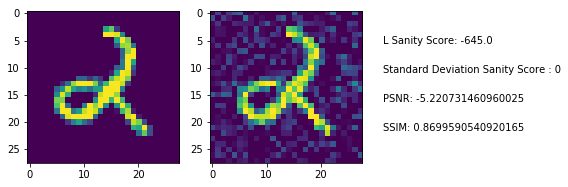

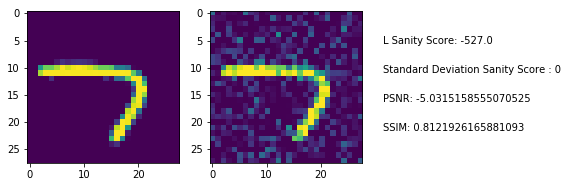

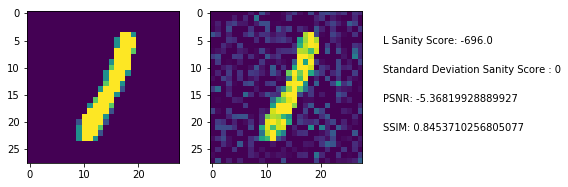

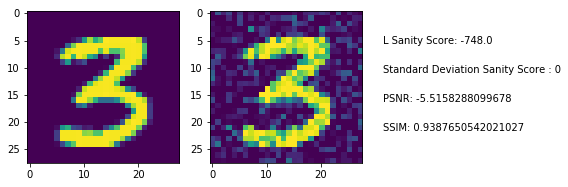

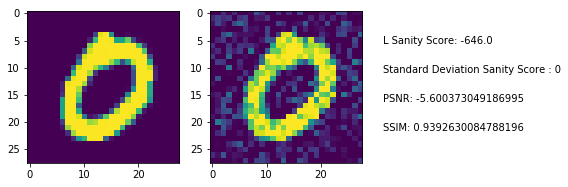

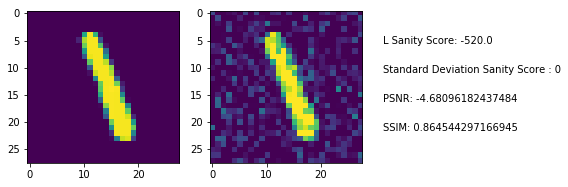

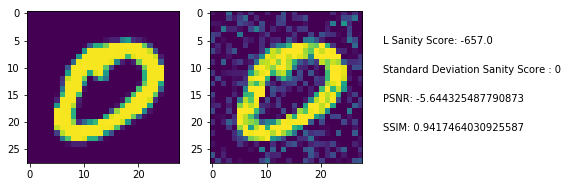

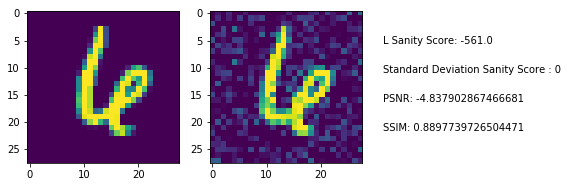

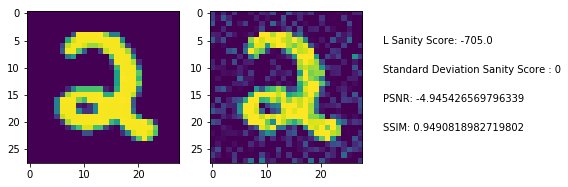

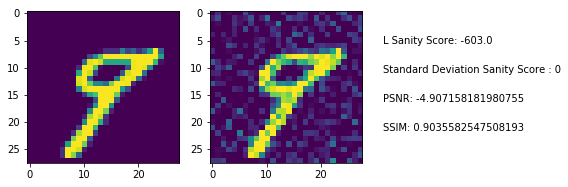

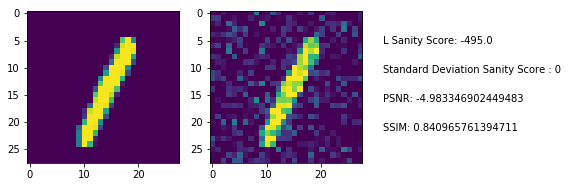

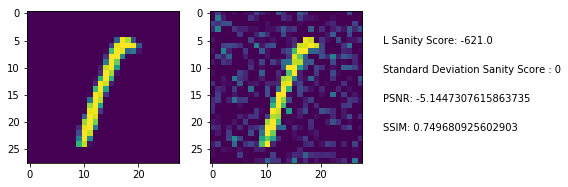

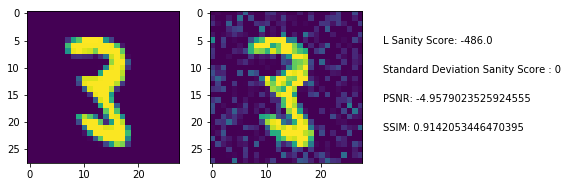

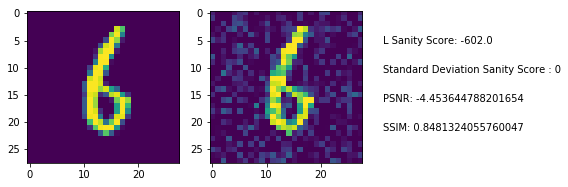

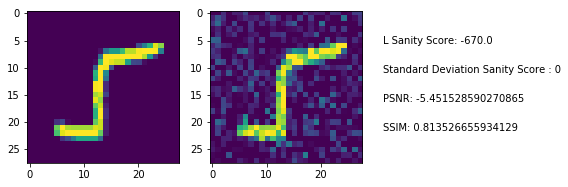

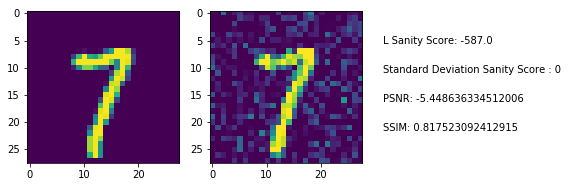

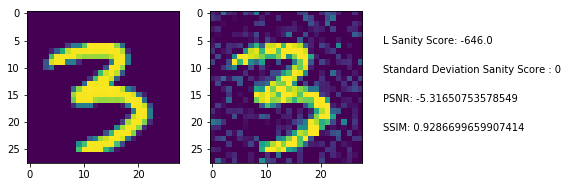

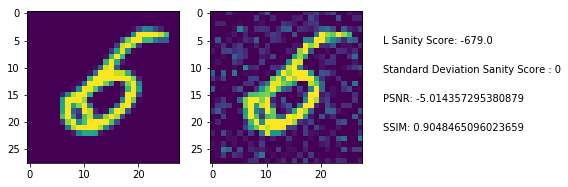

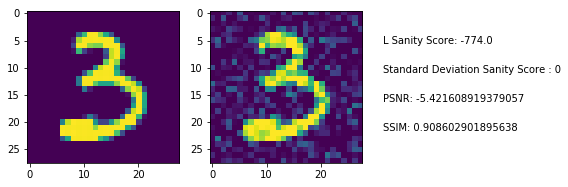

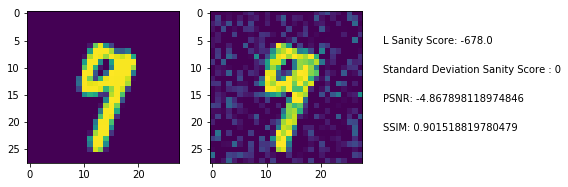

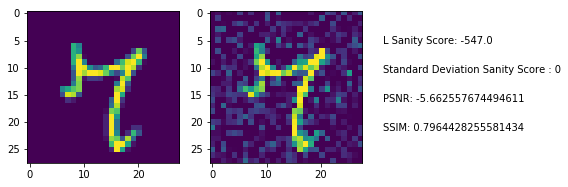

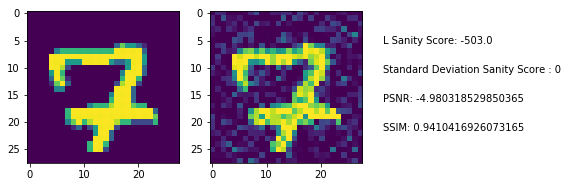

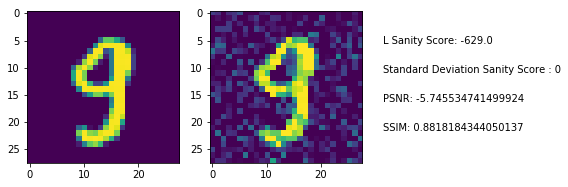

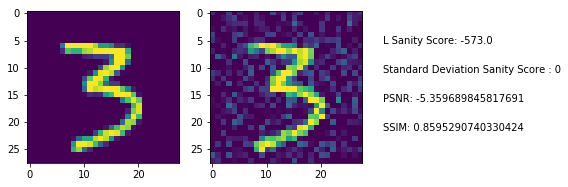

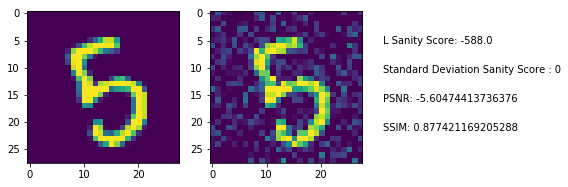

In [165]:
for i in range(25):
    pyplot.figure(i)
    original_input = test_images[np.random.choice(test_size)]
    pyplot.subplot(121)
    pyplot.imshow(original_input)
    noise = (40*np.random.randn(*original_input.shape)).astype(int)
    mutated_input = np.maximum(0, np.minimum(255, original_input + noise))
    pyplot.subplot(122)
    pyplot.imshow(mutated_input)
    sanity_l = calc_sanity_punishment(original_input, mutated_input)
    pyplot.figtext(0.95, 0.65, "L Sanity Score: " + str(sanity_l))
    sanity_std = calc_sanity_punishment_std(original_input, mutated_input)
    pyplot.figtext(0.95, 0.55, "Standard Deviation Sanity Score: " + str(sanity_std))
    pnsr = calc_PSNR(original_input, mutated_input)
    pyplot.figtext(0.95, 0.45, "PSNR: " + str(pnsr))
    ssim = calc_SSIM(original_input, mutated_input)
    pyplot.figtext(0.95, 0.35, "SSIM: " + str(ssim))

* RL vs 60 variance gaussian noise vs genetic algorithm